In [1]:
import numpy as np

np.set_printoptions(precision=3)

## Working Example

In [2]:
Q = np.array([
    [ 0.00, -0.80, -0.60],
    [ 0.80, -0.36,  0.48],
    [ 0.60,  0.48, -0.64]
])

D = np.array([
    [9, 0, 0],
    [0, 4, 0],
    [0, 0, 1]
])

A = Q.T @ D @ Q

In [3]:
A

array([[ 2.92 , -0.864,  1.152],
       [-0.864,  6.509,  3.322],
       [ 1.152,  3.322,  4.571]])

In [4]:
e_vals, e_vectors = np.linalg.eig(A)

In [5]:
print(e_vals)
print(e_vectors)

[ 4.  1.  9.]
[[  8.000e-01  -6.000e-01  -3.872e-17]
 [ -3.600e-01  -4.800e-01   8.000e-01]
 [  4.800e-01   6.400e-01   6.000e-01]]


## Power Iteration

In [6]:
def power_iteration(A, v=None):
    if v is None:
        v = np.random.normal(size=A.shape[1])
    previous = np.empty(shape=A.shape[1])
    while True:
        previous[:] = v
        v = A @ v
        v = v / np.linalg.norm(v)
        if np.all(np.abs(v - previous) < 0.00001):
            break
    return v

In [7]:
power_iteration(A, v=[1, 0, 0])

array([ 0.8 , -0.36,  0.48])

In [8]:
A @ np.array([1, 0, 0])

array([ 2.92 , -0.864,  1.152])

## Simultaneous Orthogonalization

In [9]:
def simultaneous_orthogonalization(A):
    Q = np.random.normal(size=A.shape)
    previous = np.empty(shape=Q.shape)
    for i in range(100):
        previous[:] = Q
        Qp = A @ Q
        Q = Qp / np.linalg.norm(Qp, axis=0)
        #Q, R = np.linalg.qr(X)
        if np.all(np.abs(Q - previous) < 0.00001):
            break
    return Q

In [10]:
simultaneous_orthogonalization(A)

array([[  3.755e-07,  -9.931e-07,  -5.402e-06],
       [  8.000e-01,  -8.000e-01,  -8.000e-01],
       [  6.000e-01,  -6.000e-01,  -6.000e-01]])

In [11]:
def simultaneous_orthogonalization(A):
    Q = np.random.normal(size=A.shape)
    memo = []; memo.append(Q)
    previous = np.empty(shape=Q.shape)
    for i in range(100):
        previous[:] = Q
        X = A @ Q
        Q, R = np.linalg.qr(X)
        memo.append(Q)
        if np.all(np.abs(Q - previous) < 0.001):
            break
    return Q, memo

In [12]:
Q, basies = simultaneous_orthogonalization(A)
Q

array([[ -1.431e-04,   7.999e-01,  -6.001e-01],
       [ -7.999e-01,  -3.602e-01,  -4.800e-01],
       [ -6.001e-01,   4.800e-01,   6.399e-01]])

## 3D Rendering of Basis

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
def plot_basis(ax, Q):
    ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
    for i in range(Q.shape[1]):
        ax.quiver(0, 0, 0, Q[0, i], Q[1, i], Q[2, i], 
                  pivot='tail', color='black')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

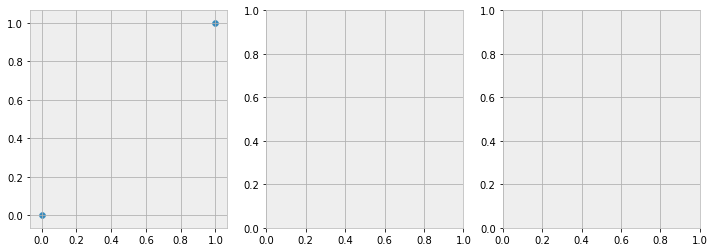

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), )

for 